The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


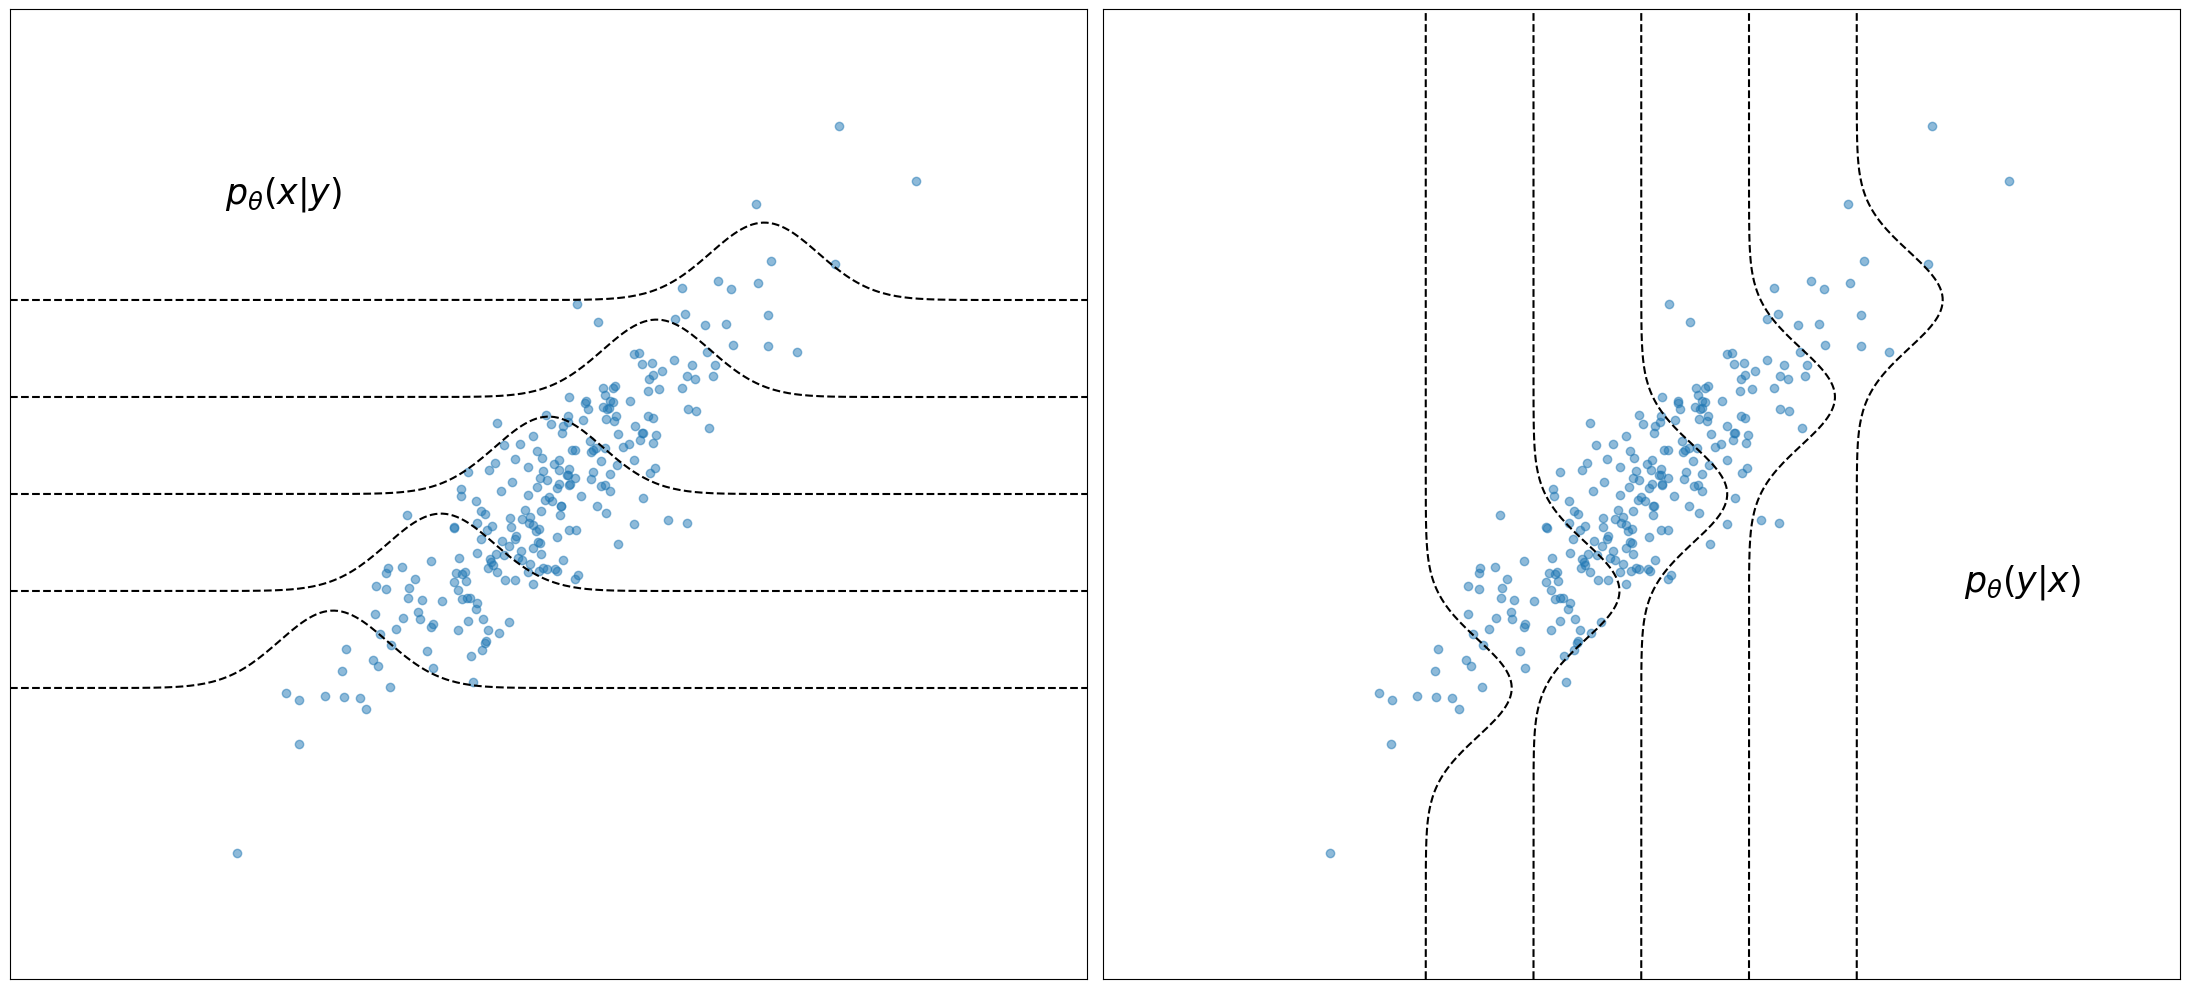

In [68]:
from misc import * 
import torch
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.ticker import MaxNLocator
from regressor import *
from utils import *
%load_ext autoreload
%autoreload 2
torch.manual_seed(0)

scale_sigma2 = torch.tensor(.5)
shape_sigma2 = torch.tensor(.5)
sigma20 = pyro.distributions.InverseGamma(shape_sigma2, scale_sigma2).sample()
sigma20 = torch.tensor(0.25)

mu_beta = torch.zeros(2)
Sigma_beta = torch.eye(2)
alpha = torch.distributions.MultivariateNormal(mu_beta, Sigma_beta).sample()
alpha = torch.tensor([1.,0.])

prior_dataset = torch.distributions.Normal(torch.tensor(0.), torch.tensor(1))
n_D = 250
DX =prior_dataset.sample([n_D])

sigma2_simulateur = torch.tensor(1)
f = lambda x: alpha[0]*x + alpha[1] 
simulateur= lambda x: f(x) + torch.randn(x.shape[0])*torch.sqrt(sigma20)
DY = simulateur(DX)

y_min = torch.min(DY)-3.5
y_max = torch.max(DY)+3.5
x_min = torch.min(DX)-3.5
x_max = torch.max(DX)+3.5
tt = torch.linspace(-5,5,300)

law0 = torch.distributions.Normal(0,torch.sqrt(sigma20))
law_2 = torch.distributions.Normal(-2,torch.sqrt(sigma20))
law2 = torch.distributions.Normal(2,torch.sqrt(sigma20))
law_1 = torch.distributions.Normal(-1,torch.sqrt(sigma20))
law1 = torch.distributions.Normal(1,torch.sqrt(sigma20))

fig = plt.figure(figsize = (22,10))
ax1 = fig.add_subplot(1,2,1)
ax1.tick_params(bottom = False, left = False, labelbottom= False, labelleft = False)
ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.scatter(DX.numpy(), DY.numpy(), alpha =.5, label = r'$\mathcal{D}=\{(x_i,y_i)\}$', color = 'C0')
ax1.plot(tt, torch.exp(law.log_prob(tt)), color = 'black', linestyle = '--')
ax1.plot(tt, 2+torch.exp(law2.log_prob(tt)), color = 'black', linestyle = '--')
ax1.plot(tt, torch.exp(law_2.log_prob(tt))-2, color = 'black', linestyle = '--')
ax1.plot(tt, 1+torch.exp(law1.log_prob(tt)), color = 'black', linestyle = '--')
ax1.plot(tt, torch.exp(law_1.log_prob(tt))-1, color = 'black', linestyle = '--')
ax1.text(-3, 3, r'$p_\theta(x|y)$', fontsize=25)

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.scatter(DX.numpy(), DY.numpy(), alpha =.5, label = r'$\mathcal{D}=\{(x_i,y_i)\}$', color = 'C0')
ax2.plot(torch.exp(law.log_prob(tt)),tt, color = 'black', linestyle = '--')
ax2.plot(torch.exp(law1.log_prob(tt))+1,tt, color = 'black', linestyle = '--')
ax2.plot(torch.exp(law2.log_prob(tt))+2,tt, color = 'black', linestyle = '--')
ax2.plot(torch.exp(law_1.log_prob(tt))-1,tt, color = 'black', linestyle = '--')
ax2.plot(torch.exp(law_2.log_prob(tt))-2,tt, color = 'black', linestyle = '--')
ax2.text(3, -1, r'$p_\theta(y|x)$', fontsize=25)
fig.tight_layout()
plt.show()
plt.show()

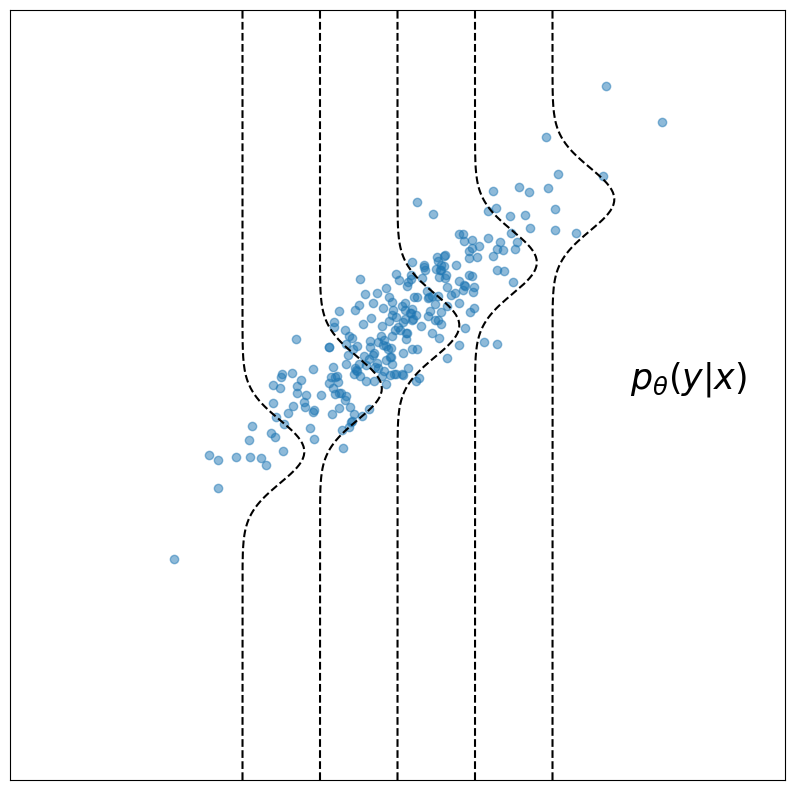